Load Dataset

In [2]:
import pandas as pd

df = pd.read_csv("telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Understanding the data

In [4]:
import numpy as np

for column in df:
    unique_vals = np.unique(df[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature customerID :7043
The number of values for feature gender :2 -- ['Female' 'Male']
The number of values for feature SeniorCitizen :2 -- [0 1]
The number of values for feature Partner :2 -- ['No' 'Yes']
The number of values for feature Dependents :2 -- ['No' 'Yes']
The number of values for feature tenure :73
The number of values for feature PhoneService :2 -- ['No' 'Yes']
The number of values for feature MultipleLines :3 -- ['No' 'No phone service' 'Yes']
The number of values for feature InternetService :3 -- ['DSL' 'Fiber optic' 'No']
The number of values for feature OnlineSecurity :3 -- ['No' 'No internet service' 'Yes']
The number of values for feature OnlineBackup :3 -- ['No' 'No internet service' 'Yes']
The number of values for feature DeviceProtection :3 -- ['No' 'No internet service' 'Yes']
The number of values for feature TechSupport :3 -- ['No' 'No internet service' 'Yes']
The number of values for feature StreamingTV :3 -- ['No' 'No internet servi

In [5]:
#checking null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
#remove unnecessary columns


df = df.drop(columns=['customerID'])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Spit data
from sklearn.model_selection import train_test_split

target = ['Churn']
cat_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']
df['tenure'] = df['tenure'].astype(float)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['TotalCharges'] = df['tenure'].astype(float)

X = df.drop(columns=target) 
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#check the shape of the data


In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5634, 19), (5634, 1), (1409, 19), (1409, 1))

Data Visualize

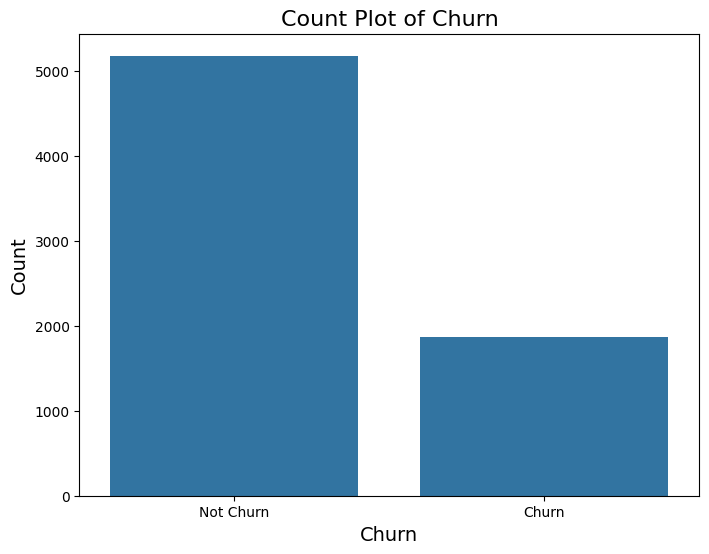

Churn
No       0.734469
Yes      0.265531
Name: proportion, dtype: float64

In [11]:
from matplotlib import pyplot as plt
import seaborn as sb

# Count Plot of our Y - Check the balance of the dataset
plt.figure(figsize=(8, 6))
sb.countplot(data=df, x="Churn")
plt.title("Count Plot of Churn", fontsize=16)
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], labels=["Not Churn", "Churn"])
plt.show()

y_train.value_counts(normalize=True)

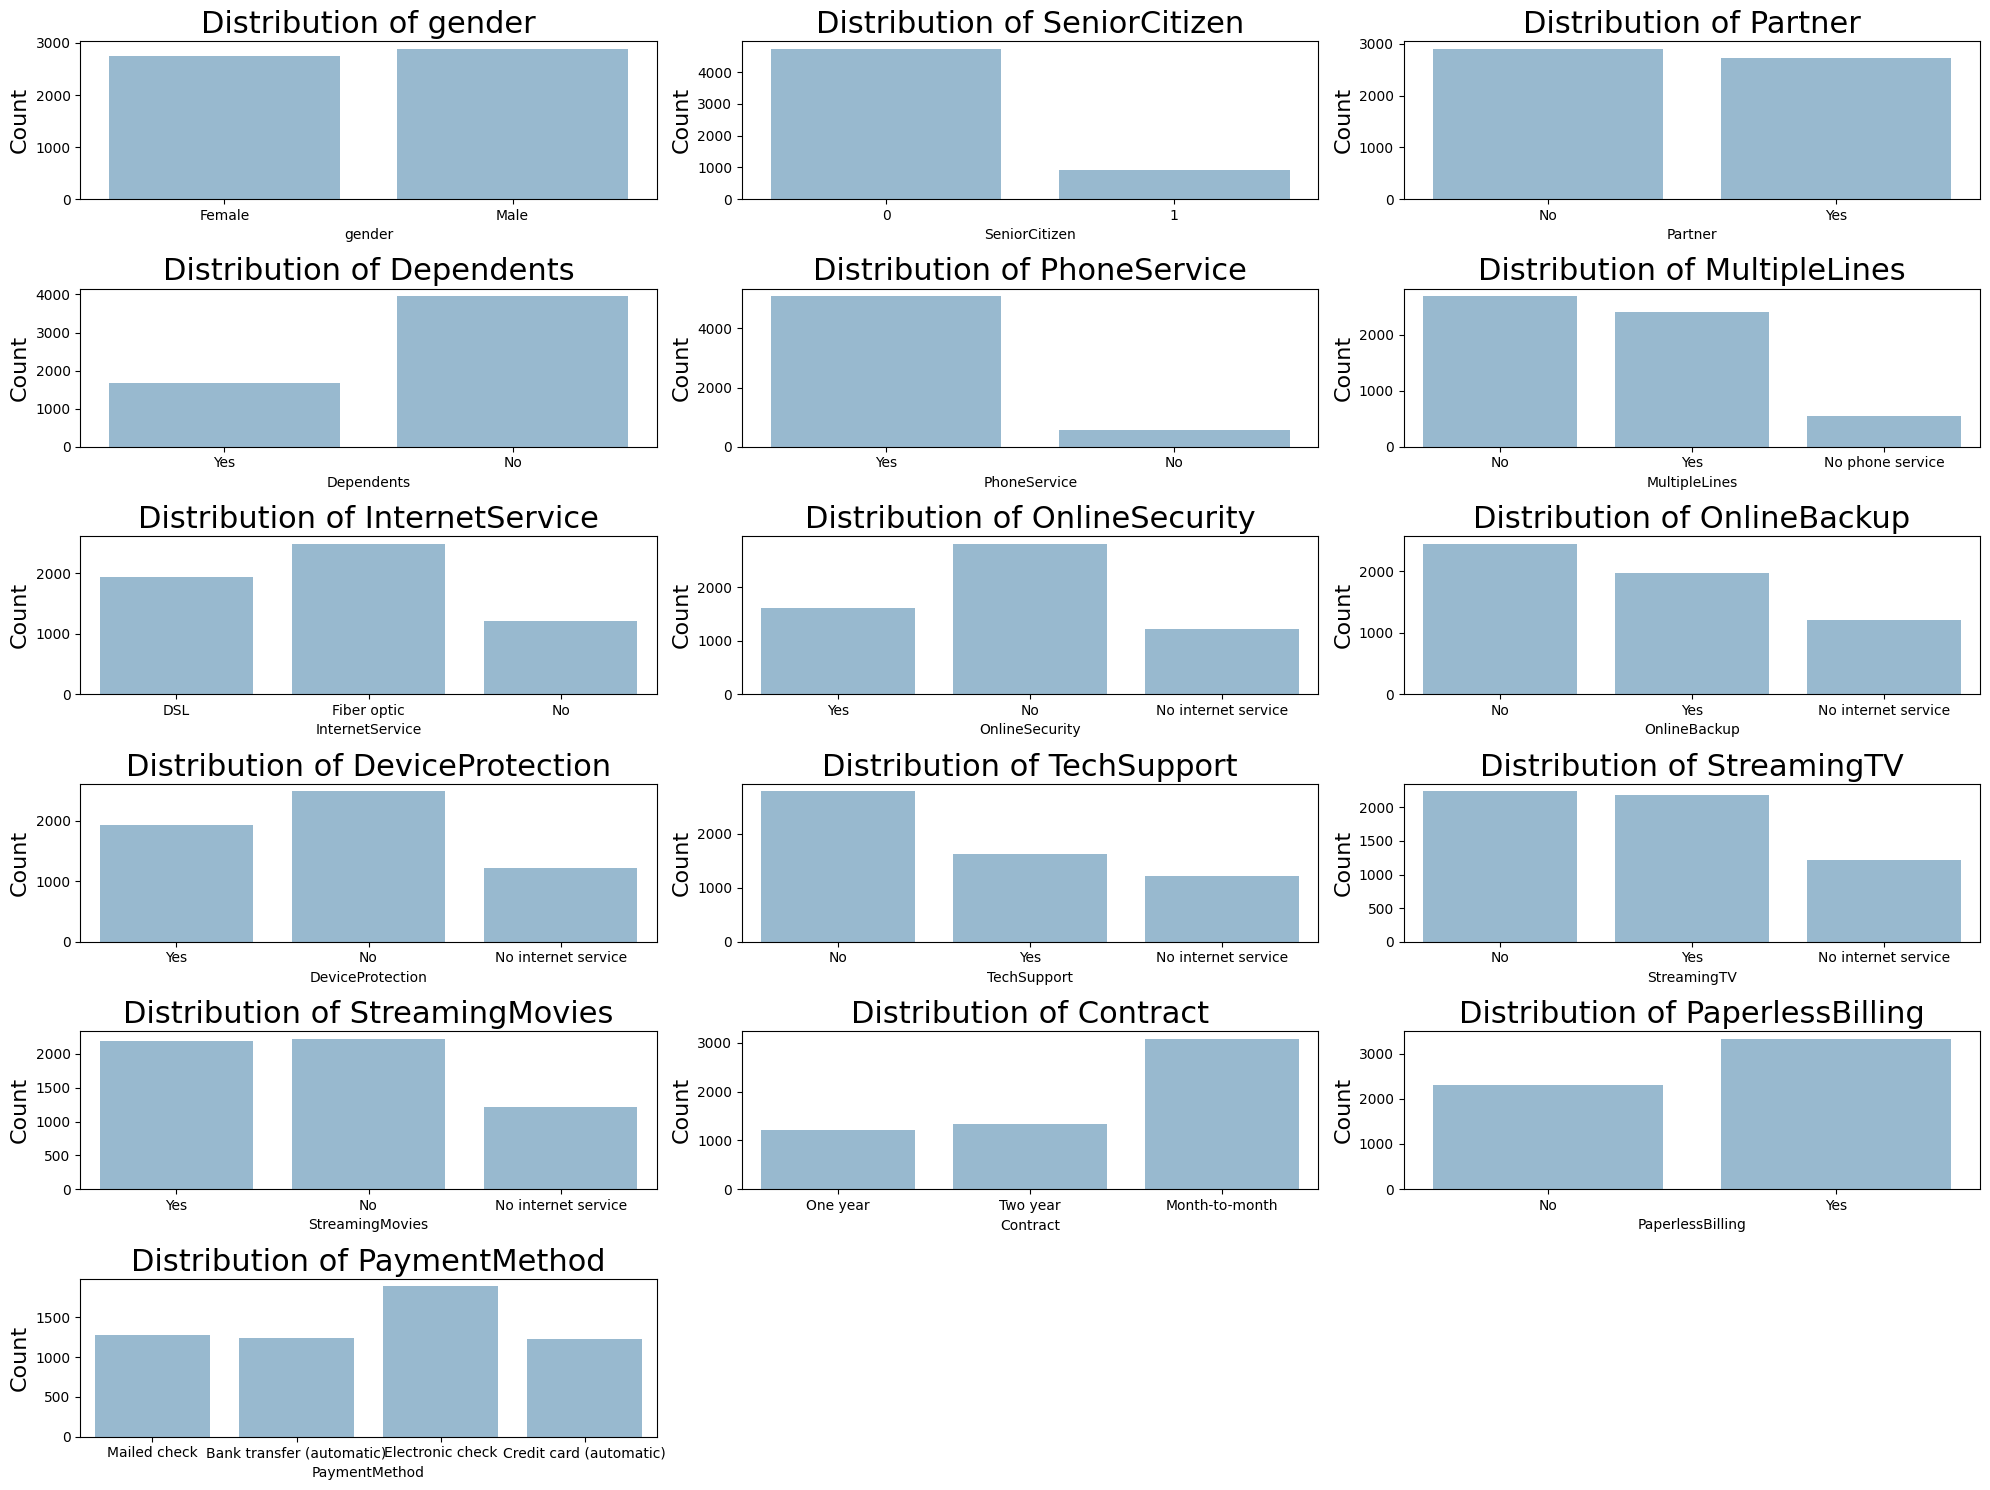

In [12]:
#distribution of cat_var
plt.figure(figsize=(20, 15))

for i, col in enumerate(cat_var):
    plt.subplot(6,3,i+1)
    if len(X_train[col].unique()) <=5:
        sb.countplot(data=X_train, x = col, alpha = 0.5)
        plt.ylabel("Count", fontdict={'fontsize':16})
    else:
        sb.countplot(df=X_train, y=col, order=X_train[col].value_counts().index, alpha=0.5)
    plt.title(f"""Distribution of {col}""", fontdict={'fontsize':22})
    plt.xlabel
    plt.ylabel

plt.tight_layout()
plt.savefig("Categorical Distribution")
plt.show()

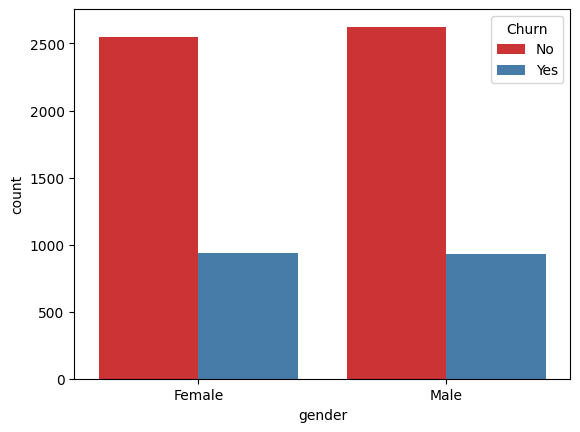

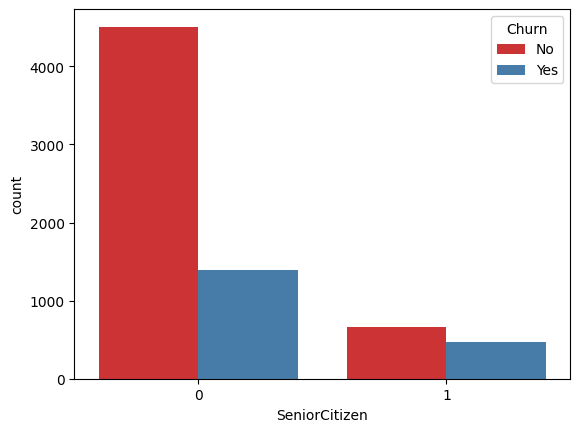

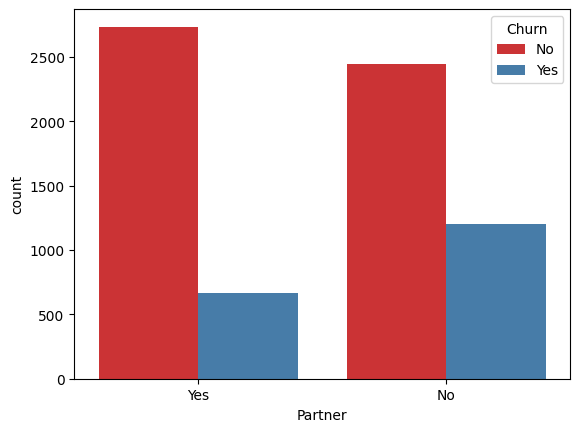

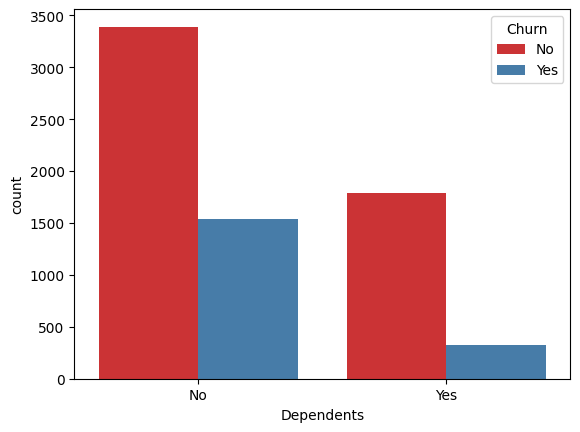

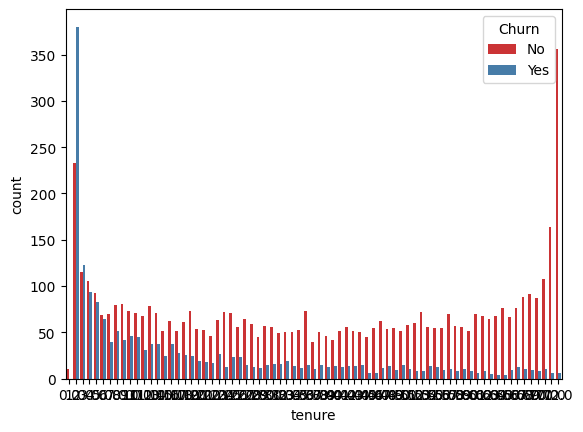

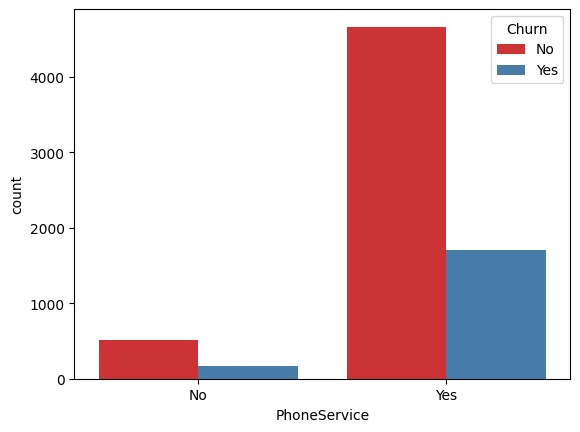

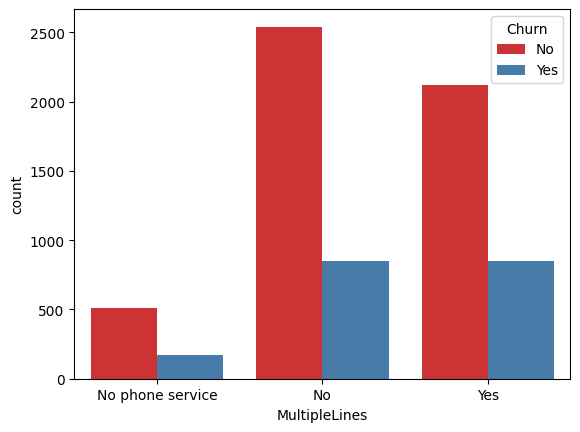

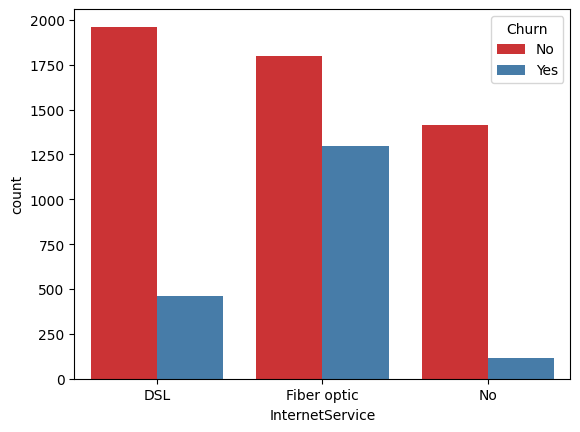

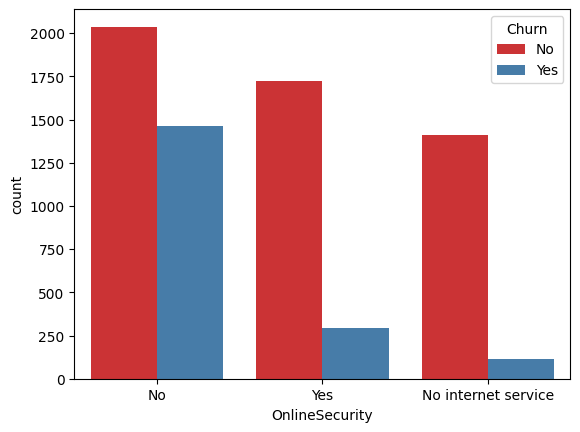

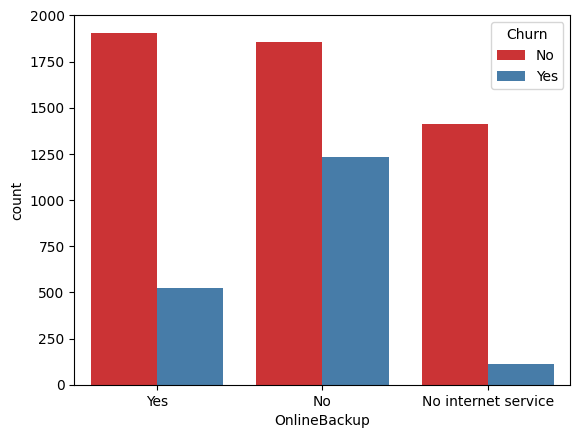

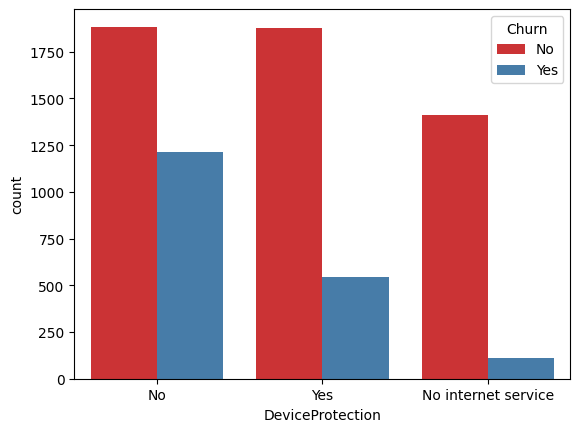

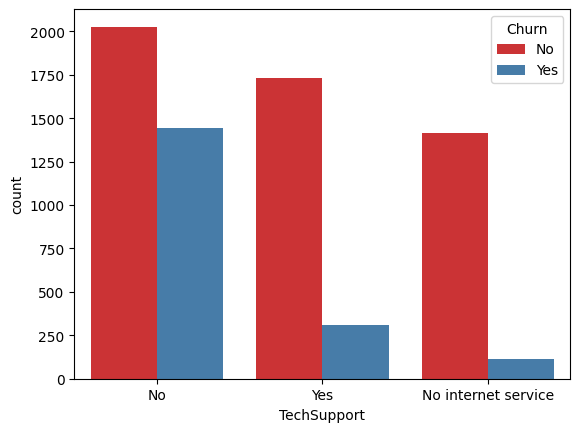

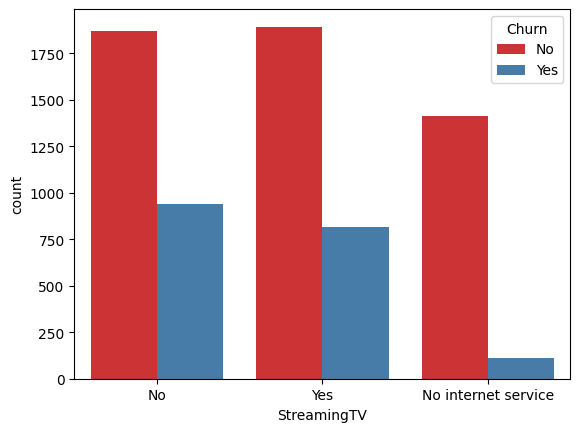

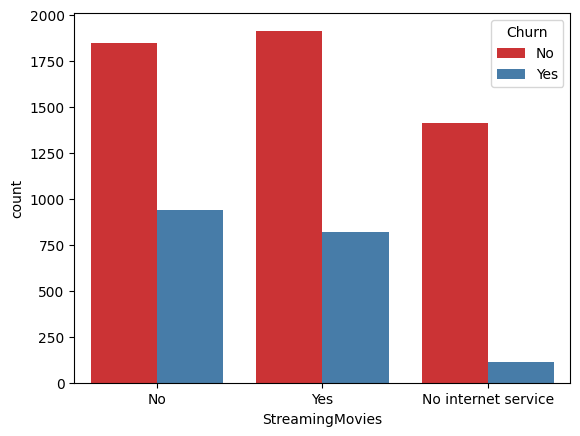

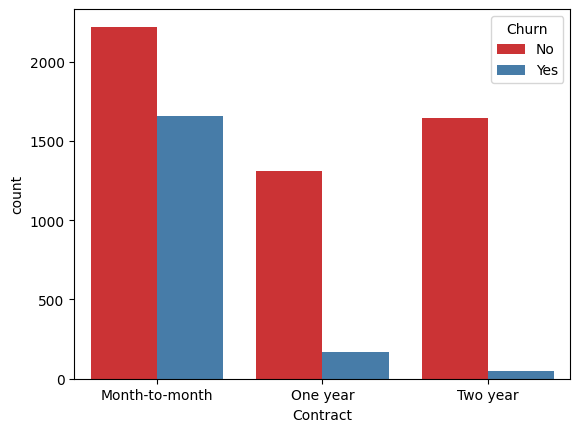

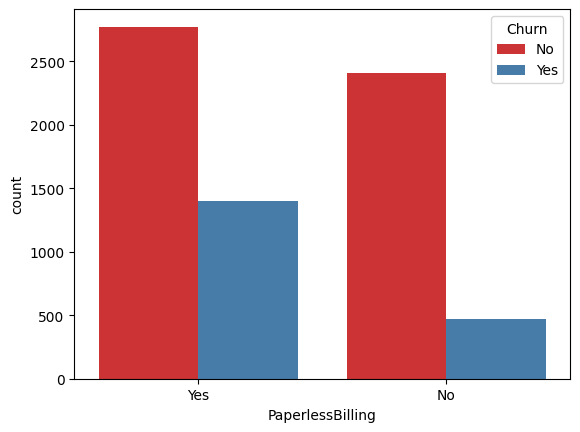

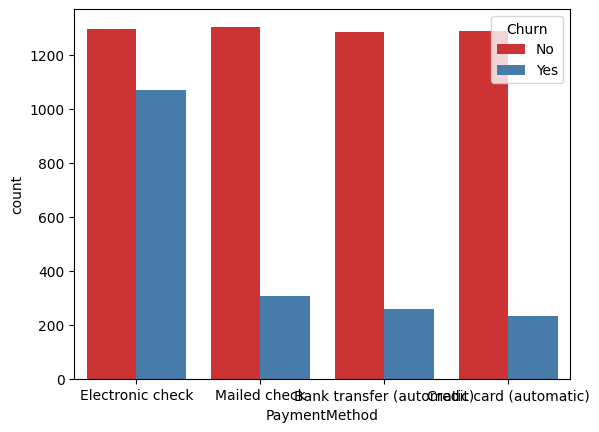

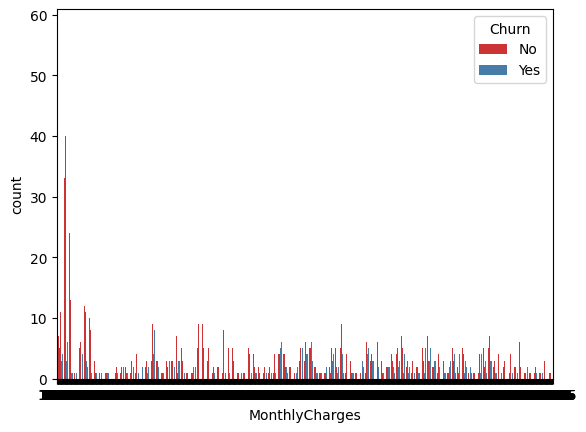

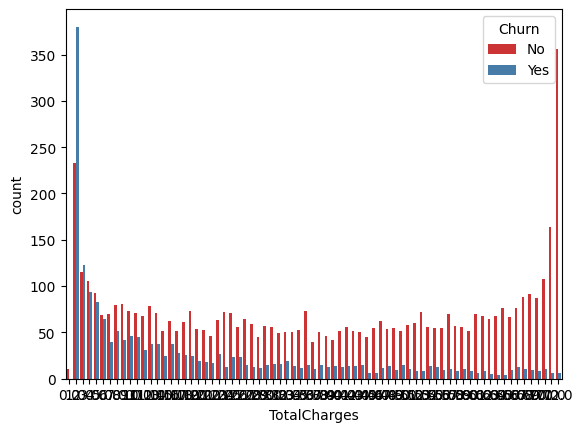

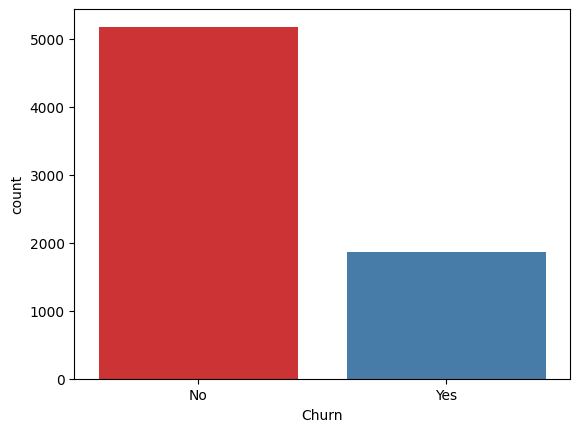

In [13]:
#investigate target by churn
for f in df:
    plt.figure()
    ax = sb.countplot(data=df, x=f, hue="Churn", palette="Set1")

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,1.0,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,34.0,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,2.0,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,45.0,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,2.0,Yes


The meadian is:  0.0


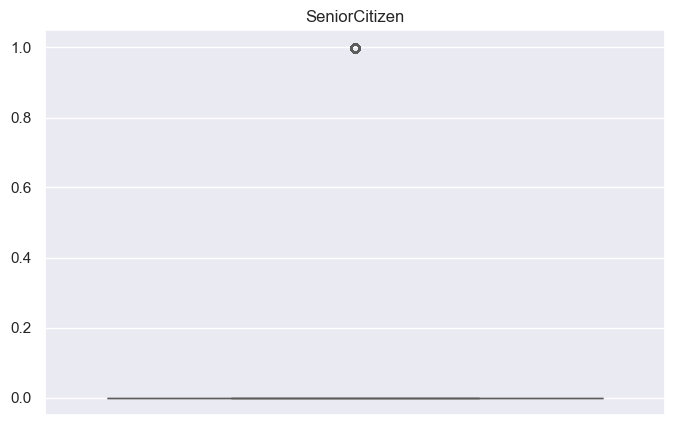

The meadian is:  29.0


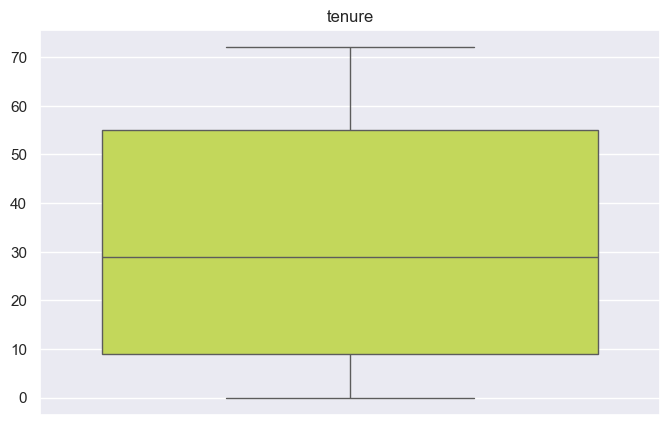

The meadian is:  70.35


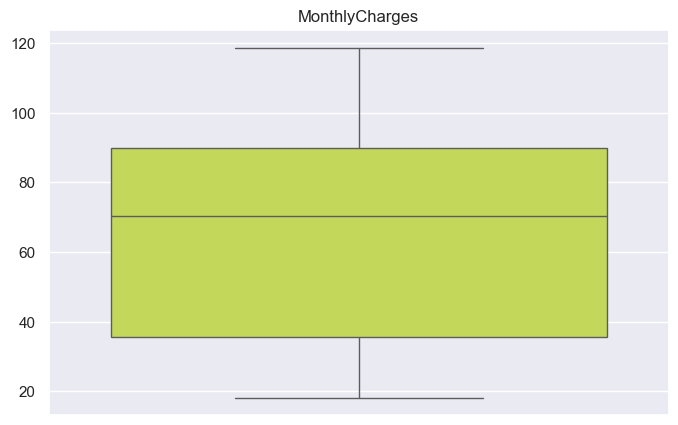

The meadian is:  29.0


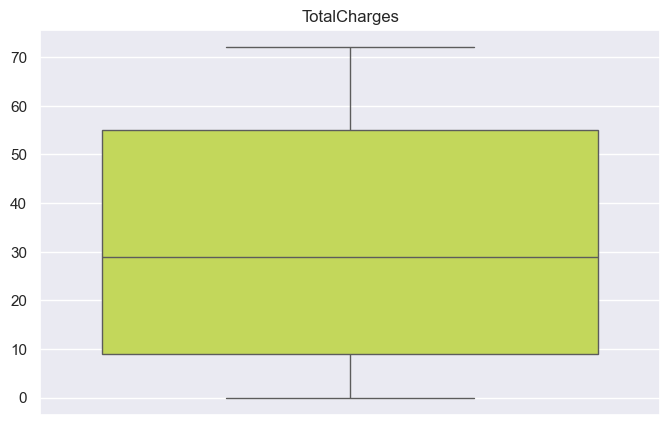

In [15]:
#indetify numerical values

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = df.select_dtypes(include=numerics).columns

# Increases the size of sns plots
sb.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = df[c].values
    ax = sb.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', df[c].median())
    plt.title(c)
    plt.show()

In [16]:
X_train[num_var].head()

,tenure,MonthlyCharges,TotalCharges
2142,21.0,64.85,21.0
1623,54.0,97.20,54.0
6074,1.0,23.45,1.0
1362,4.0,70.20,4.0
6754,0.0,61.90,0.0


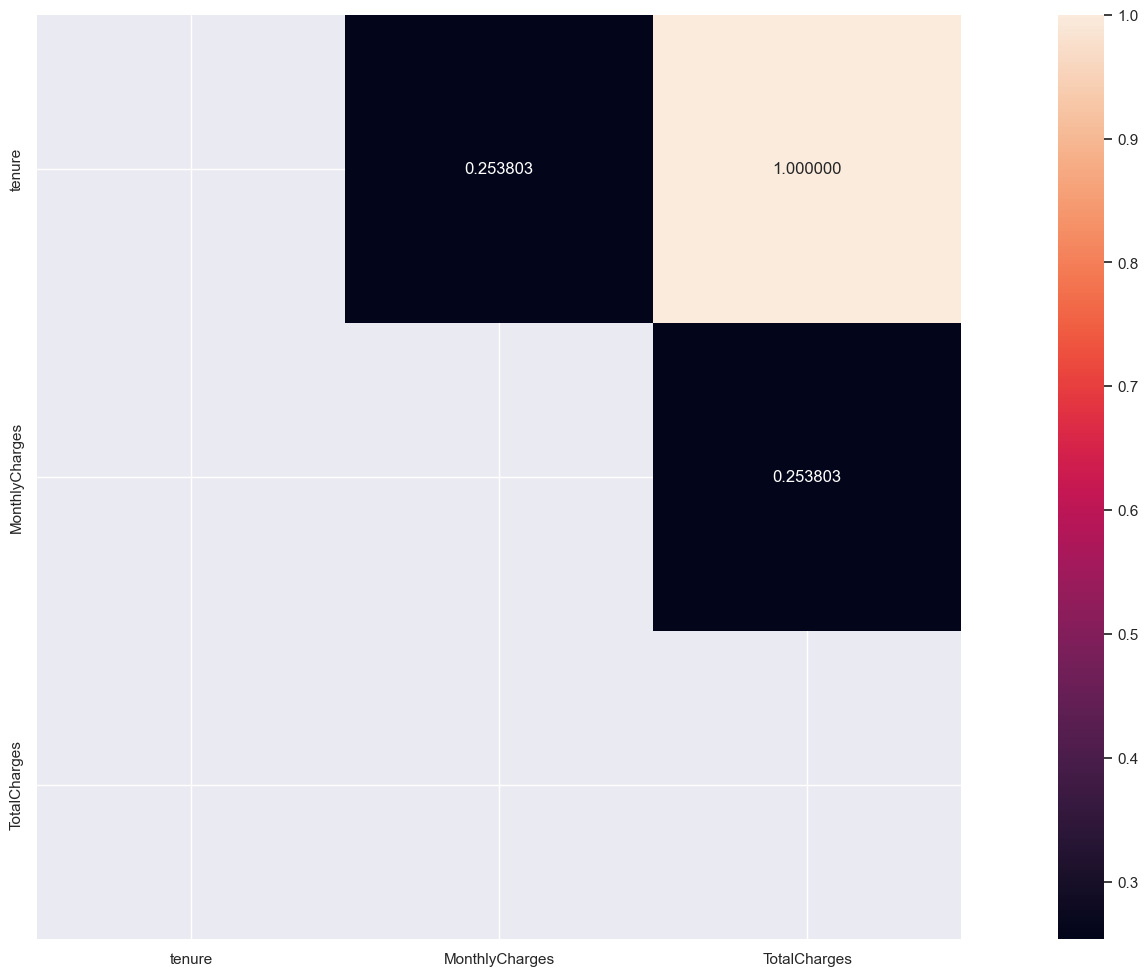

In [17]:
#corelation matrix

corr= X_train[num_var].corr()

plt.figure(figsize=(25, 12))
mask = np.tril(np.ones_like(corr))
sb.heatmap(corr, annot=True, fmt="2f", mask=mask, square=True)
plt.show()

In [18]:
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


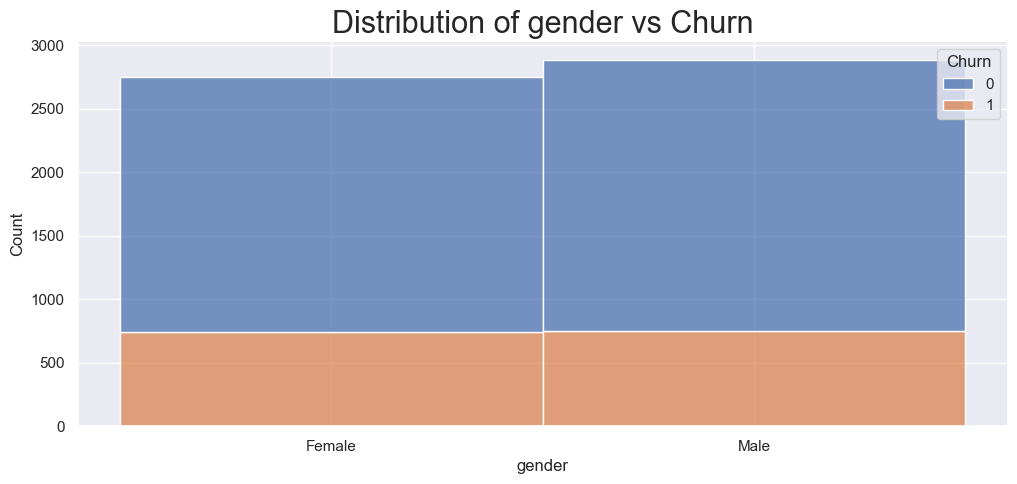

Overall frequency: 


gender
Male      0.512425
Female    0.487575
Name: proportion, dtype: float64

**************************************************


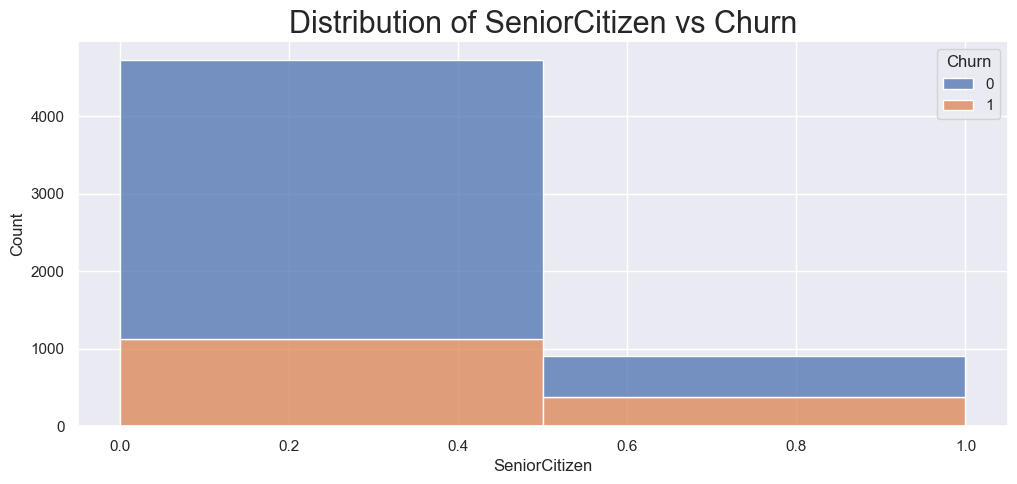

Overall frequency: 


SeniorCitizen
0    0.839191
1    0.160809
Name: proportion, dtype: float64

**************************************************


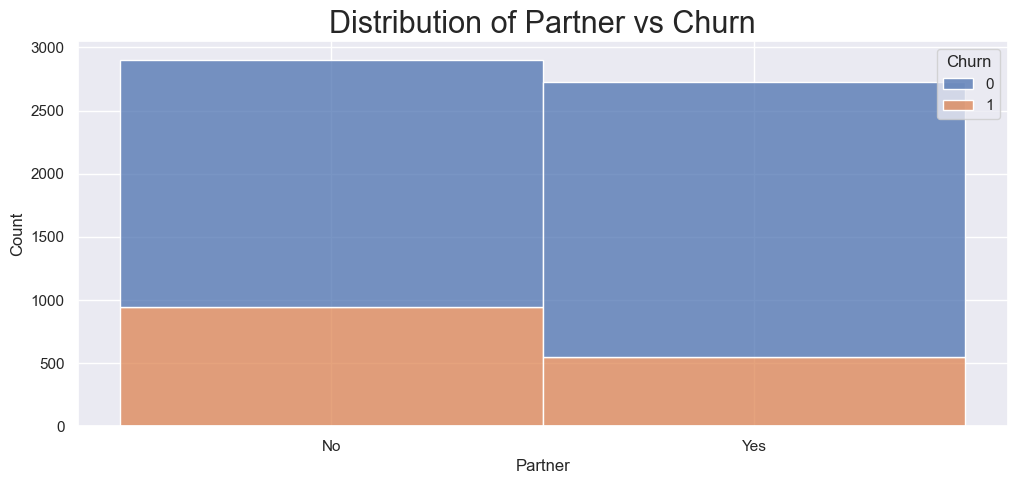

Overall frequency: 


Partner
No     0.515442
Yes    0.484558
Name: proportion, dtype: float64

**************************************************


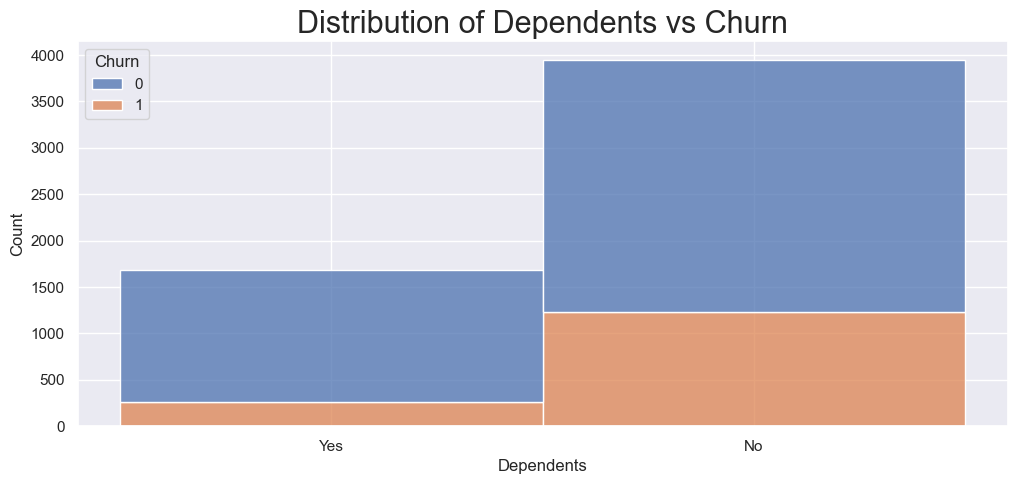

Overall frequency: 


Dependents
No     0.701278
Yes    0.298722
Name: proportion, dtype: float64

**************************************************


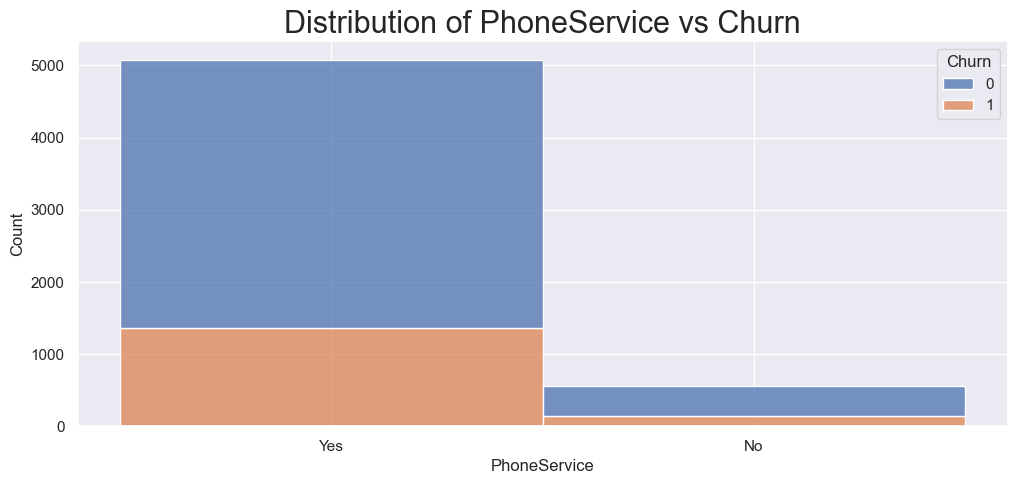

Overall frequency: 


PhoneService
Yes    0.902023
No     0.097977
Name: proportion, dtype: float64

**************************************************


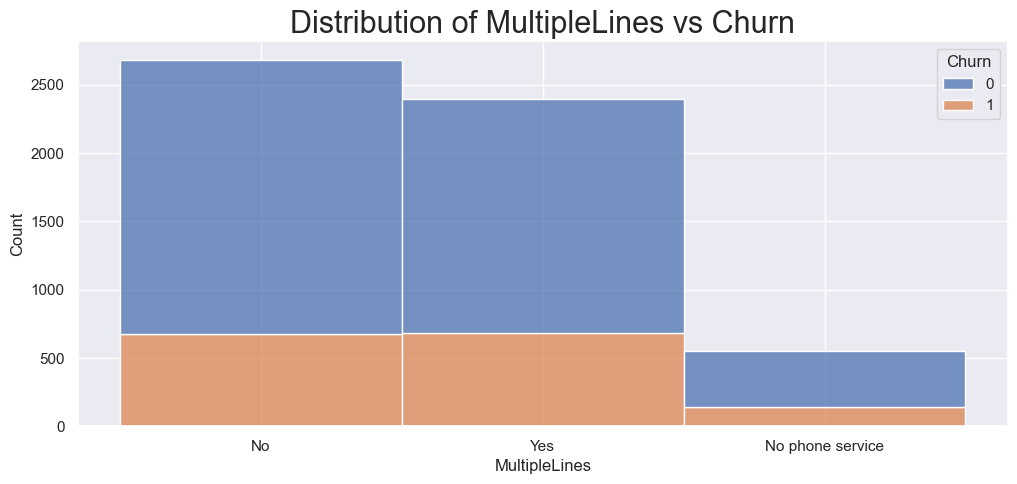

Overall frequency: 


MultipleLines
No                  0.476571
Yes                 0.425453
No phone service    0.097977
Name: proportion, dtype: float64

**************************************************


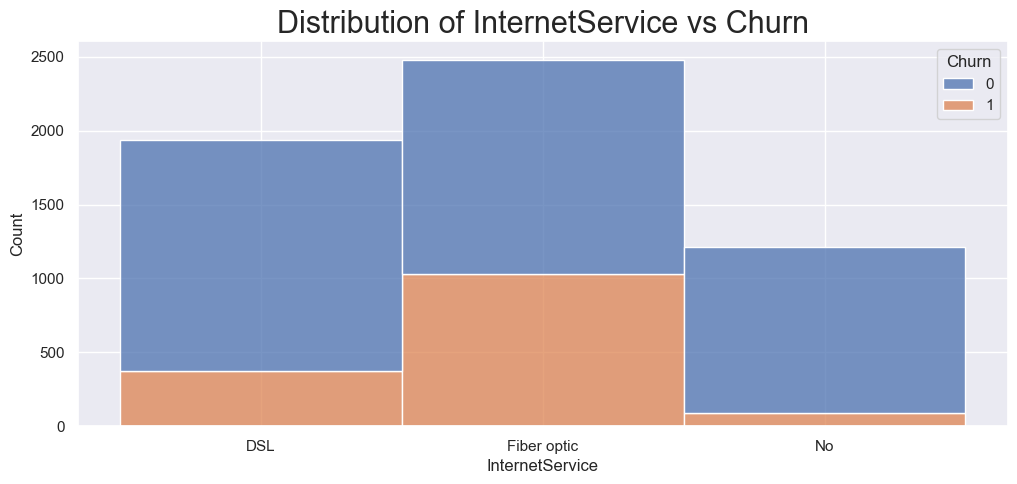

Overall frequency: 


InternetService
Fiber optic    0.440362
DSL            0.344160
No             0.215477
Name: proportion, dtype: float64

**************************************************


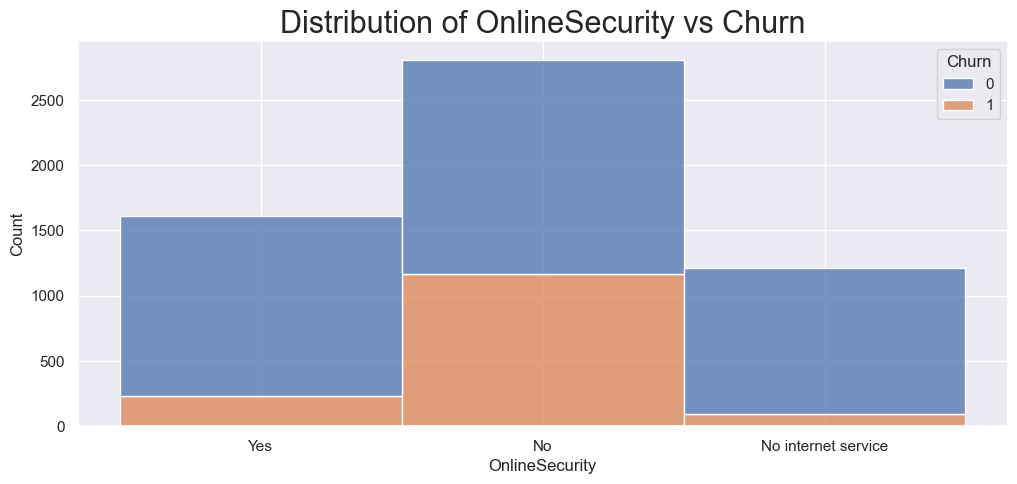

Overall frequency: 


OnlineSecurity
No                     0.498758
Yes                    0.285765
No internet service    0.215477
Name: proportion, dtype: float64

**************************************************


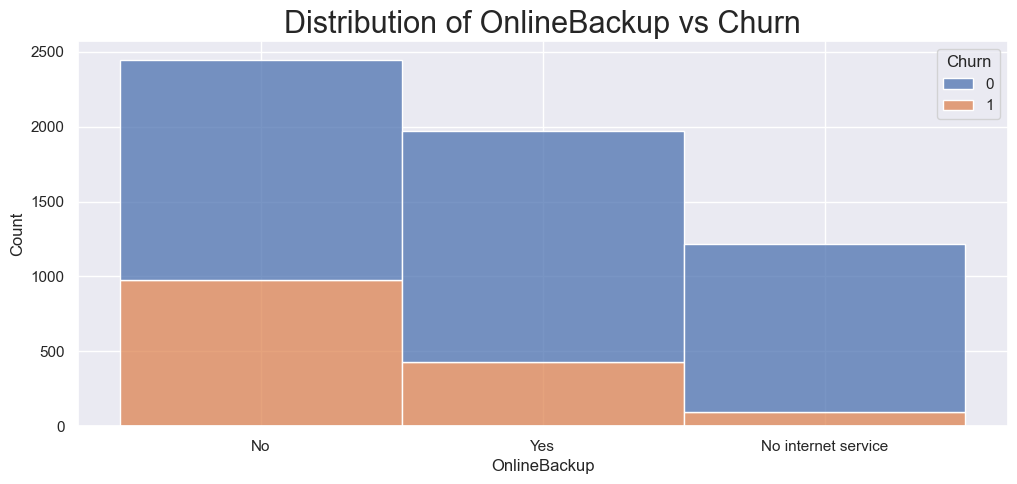

Overall frequency: 


OnlineBackup
No                     0.434505
Yes                    0.350018
No internet service    0.215477
Name: proportion, dtype: float64

**************************************************


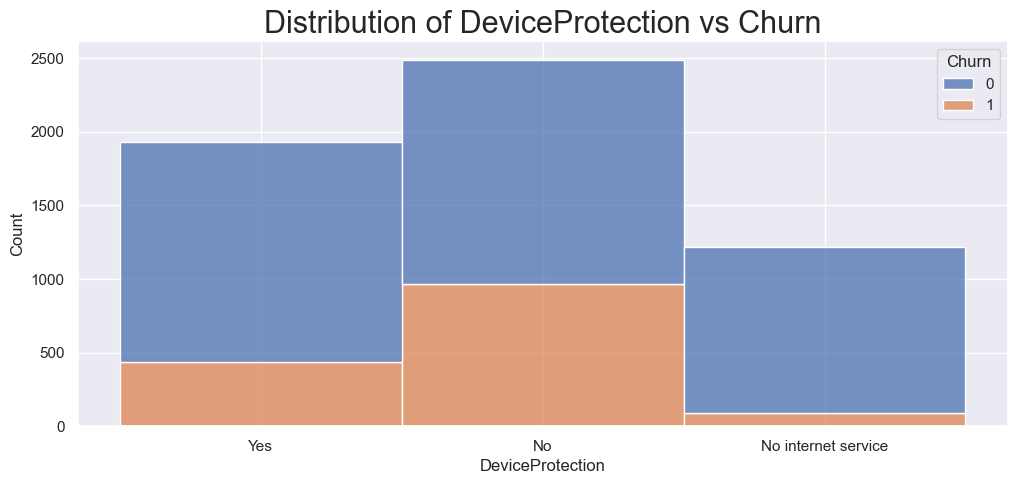

Overall frequency: 


DeviceProtection
No                     0.441782
Yes                    0.342741
No internet service    0.215477
Name: proportion, dtype: float64

**************************************************


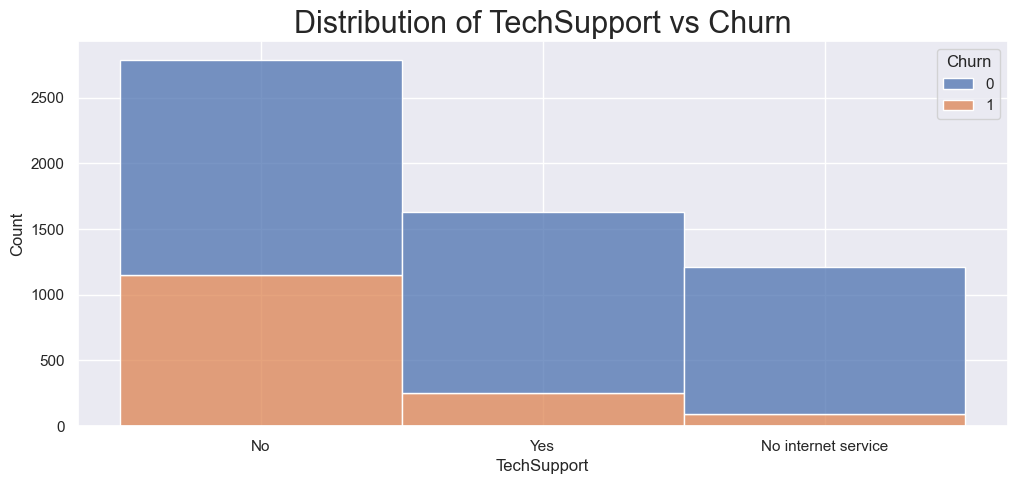

Overall frequency: 


TechSupport
No                     0.495385
Yes                    0.289137
No internet service    0.215477
Name: proportion, dtype: float64

**************************************************


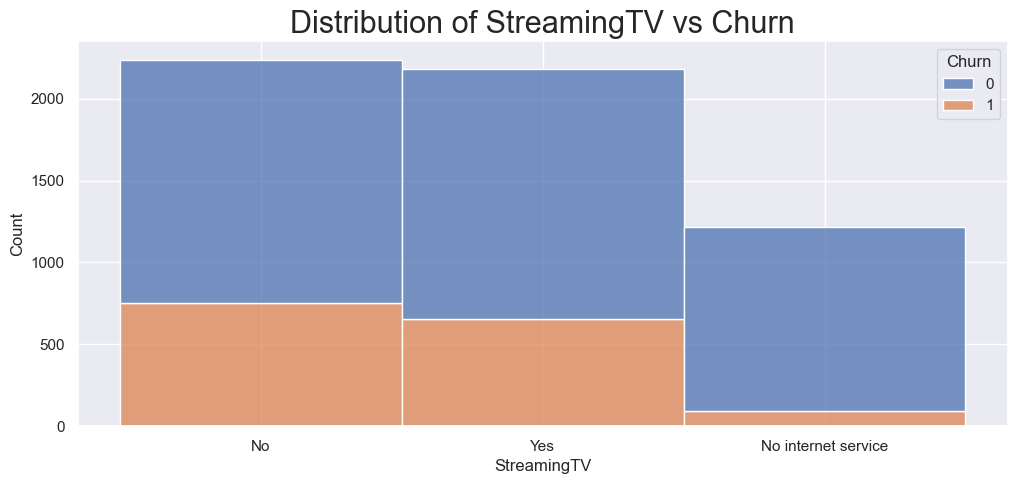

Overall frequency: 


StreamingTV
No                     0.397409
Yes                    0.387114
No internet service    0.215477
Name: proportion, dtype: float64

**************************************************


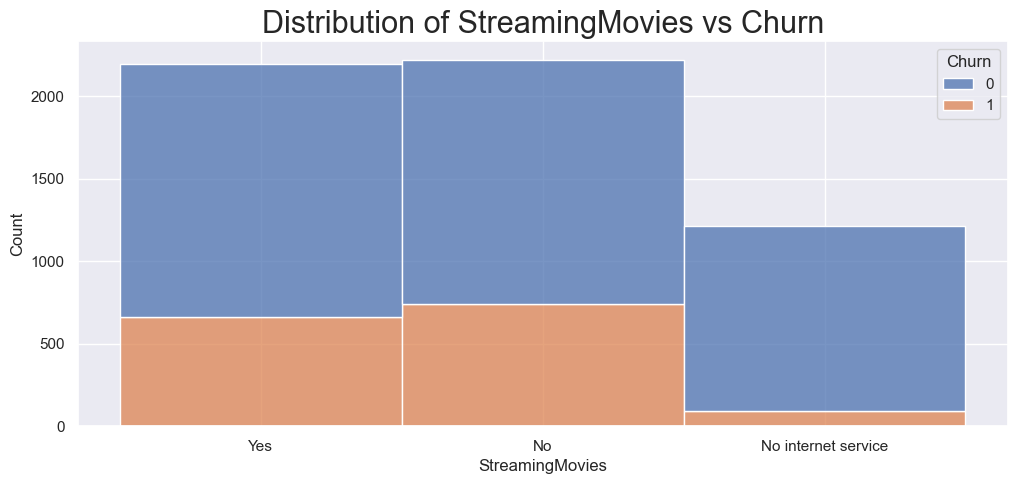

Overall frequency: 


StreamingMovies
No                     0.394569
Yes                    0.389954
No internet service    0.215477
Name: proportion, dtype: float64

**************************************************


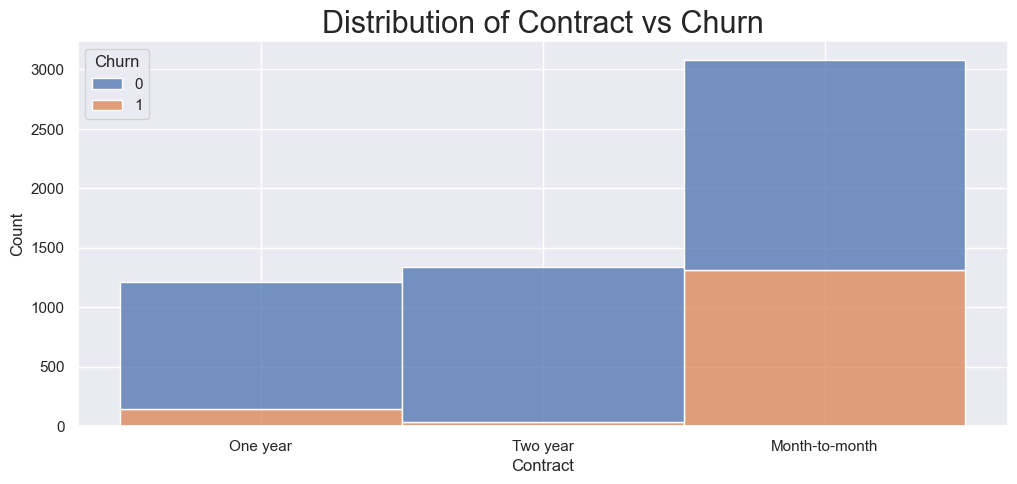

Overall frequency: 


Contract
Month-to-month    0.547213
Two year          0.237664
One year          0.215122
Name: proportion, dtype: float64

**************************************************


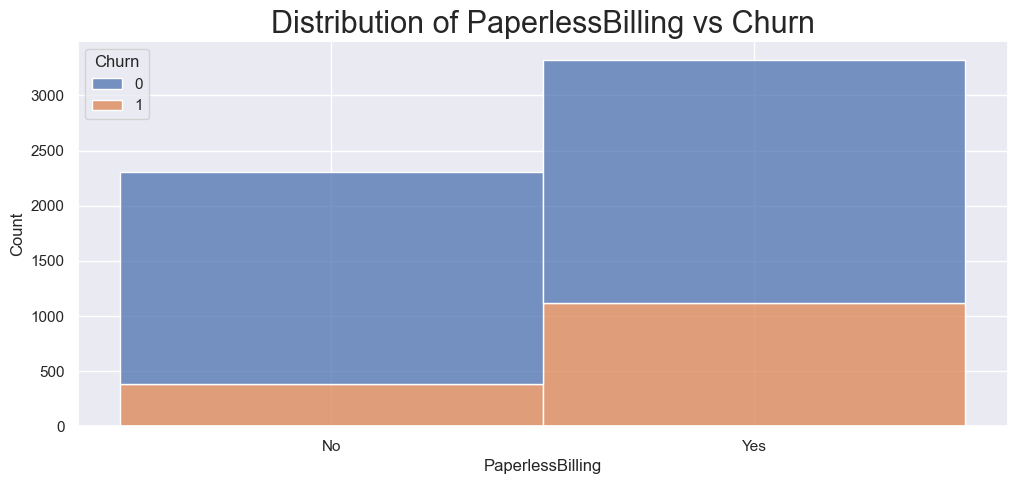

Overall frequency: 


PaperlessBilling
Yes    0.590167
No     0.409833
Name: proportion, dtype: float64

**************************************************


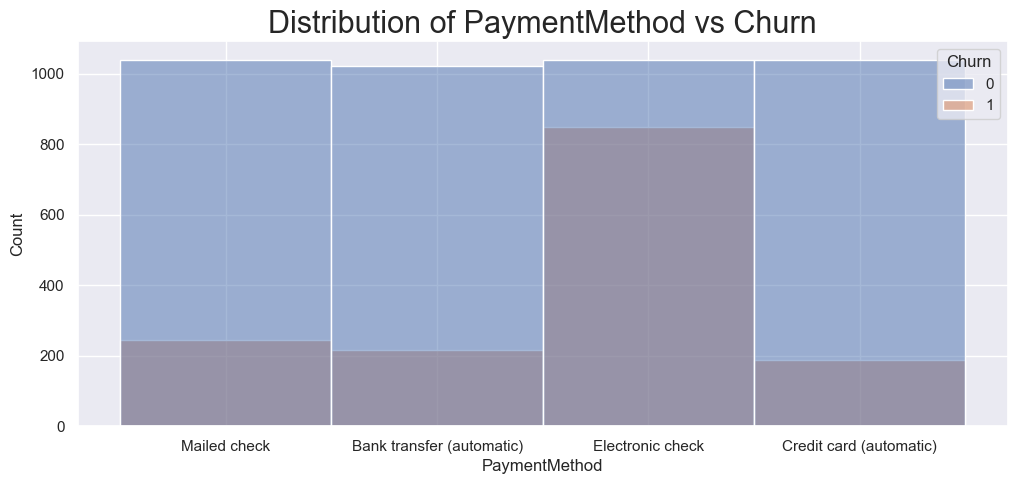

Overall frequency: 


PaymentMethod
Electronic check             0.334931
Mailed check                 0.227547
Bank transfer (automatic)    0.219737
Credit card (automatic)      0.217785
Name: proportion, dtype: float64

**************************************************


In [19]:

import plotly.graph_objects as go

# Combine features and target
df_train = pd.concat([X_train, y_train], axis=1)

# Ensure the target variable is binary numeric
if df_train['Churn'].dtype == object:
    df_train['Churn'] = df_train['Churn'].map({'Yes': 1, 'No': 0})

# Loop through categorical variables
for col in cat_var:
    if col in df_train.columns:
        plt.figure(figsize=(12, 5))
        if len(X_train[col].unique()) < 4:
            sb.histplot(binwidth=0.5, x=col, hue=df_train['Churn'], data=df_train, stat="count", multiple="stack", bins=10)
        else:
            sb.histplot(binwidth=0.5, x=col, hue=df_train['Churn'], data=df_train)
        plt.title(f"""Distribution of {col} vs Churn""", fontdict={'fontsize':22})
        plt.show()

        print('Overall frequency: ')
        display(X_train[col].value_counts(normalize=True))

        # Compute odds ratio
        unique_values = df_train[col].unique()
        odds_dict = {}
        for unique_val in unique_values:
            is_churned = len(df_train[(df_train["Churn"] == 1) & (df_train[col] == unique_val)])
            not_churned = len(df_train[(df_train["Churn"] == 0) & (df_train[col] == unique_val)])
            odds_dict[unique_val] = round((is_churned / (not_churned + 1e-6)) * 100, 2)

        odds_df = pd.Series(odds_dict, name=f'{col}_odds_ratio - Churn/Not Churn (%)').reset_index() \
            .rename(columns={'index': 'Categories'})

        # Display table using Plotly
        fig = go.Figure(data=[go.Table(
            header=dict(values=list(odds_df.columns), fill_color='paleturquoise', align='left'),
            cells=dict(values=[odds_df[val] for val in odds_df.columns], fill_color='lavender', align='left'))
        ])
        fig.update_layout(autosize=False)
        fig.show()

        print('*' * 50)

In [20]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,21.0,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,21.0
1623,Female,0,No,No,54.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,54.0
6074,Male,0,Yes,No,1.0,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,1.0
1362,Male,0,No,No,4.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,4.0
6754,Male,0,No,Yes,0.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0


In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_val = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

encoder = OneHotEncoder(sparse_output=False)
cat_mat=encoder.fit_transform(X_train[cat_val])
cat_df = pd.DataFrame(cat_mat,
                          columns=encoder.get_feature_names_out(),
                          index=X_train.index)

X_train = X_train.drop(columns=cat_val)
X_train = pd.concat([X_train, cat_df], axis=1)


In [22]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,21.0,64.85,21.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1623,54.0,97.20,54.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
6074,1.0,23.45,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1362,4.0,70.20,4.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6754,0.0,61.90,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [23]:
test_cat_mat = encoder.transform(X_test[cat_val])
test_cat_df = pd.DataFrame(test_cat_mat,
                               columns=encoder.get_feature_names_out(),
                               index=X_test.index)

X_test=X_test.drop(columns=cat_val)
X_test= pd.concat([X_test, test_cat_df], axis=1)

X_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,1.0,24.80,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2715,41.0,25.25,41.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3825,52.0,19.35,52.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1807,1.0,76.35,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
132,67.0,50.55,67.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import MinMaxScaler

#minmax scaller
sc = MinMaxScaler()
X_trainSc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_testSc =  pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)

X_trainSc.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.291667,0.464375,0.291667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.750000,0.786746,0.750000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.013889,0.051819,0.013889,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.055556,0.517688,0.055556,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.434978,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


Oversample Using SMOTE

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5
)

X_res, y_res = sm.fit_resample(X_trainSc, y_train)

Training AI

In [27]:
# Convert labels
y_res_num = y_res['Churn'].map({'No': 0, 'Yes': 1})
y_test_num = y_test['Churn'].map({'No': 0, 'Yes': 1})

# To collect results from both models
results = []


Random Forest tuning and evaluation...


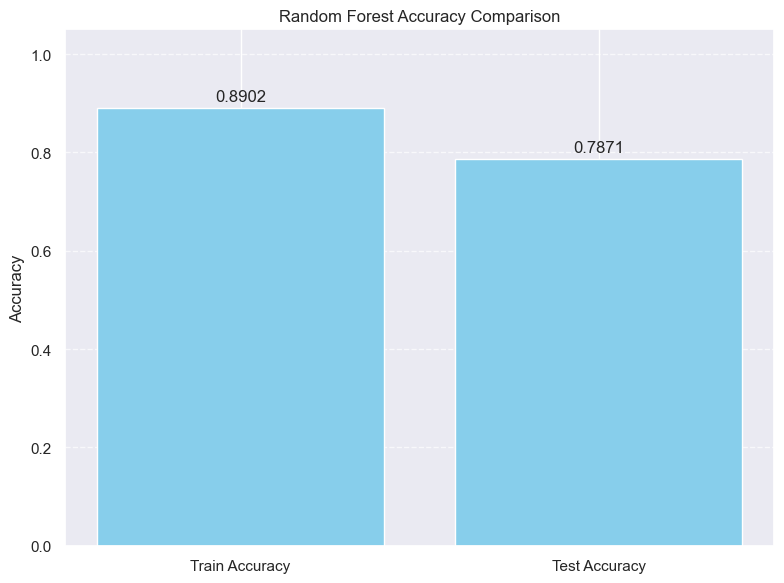

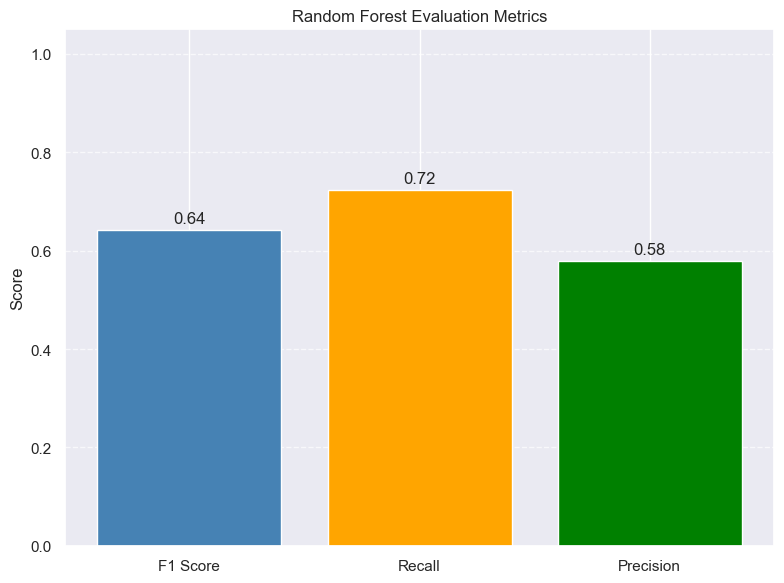

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

print("Random Forest tuning and evaluation...")

# Define parameters for tuning
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5]
}

# GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_res, y_res_num)

# Best model
rf = rf_grid.best_estimator_

# Predictions
pred_train_rf = rf.predict(X_res)
pred_test_rf = rf.predict(X_testSc)

# Accuracy scores
train_accuracy = accuracy_score(y_res_num, pred_train_rf)
test_accuracy = accuracy_score(y_test_num, pred_test_rf)

# Plot accuracy comparison
metrics = ['Train Accuracy', 'Test Accuracy']
values = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.4f}", 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords="offset points", 
                 ha='center', fontsize=12)

plt.ylim(0, 1.05)
plt.title("Random Forest Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Evaluation metrics
f1 = f1_score(y_test_num, pred_test_rf, pos_label=1)
recall = recall_score(y_test_num, pred_test_rf, pos_label=1)
precision = precision_score(y_test_num, pred_test_rf, pos_label=1)



metrics = ['F1 Score', 'Recall', 'Precision']
values = [f1, recall, precision]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['steelblue', 'orange', 'green'])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.2f}", 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords="offset points", 
                 ha='center', fontsize=12)

plt.ylim(0, 1.05)
plt.title("Random Forest Evaluation Metrics")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Best Parameters:", rf_grid.best_params_)




XGBoost tuning and evaluation...


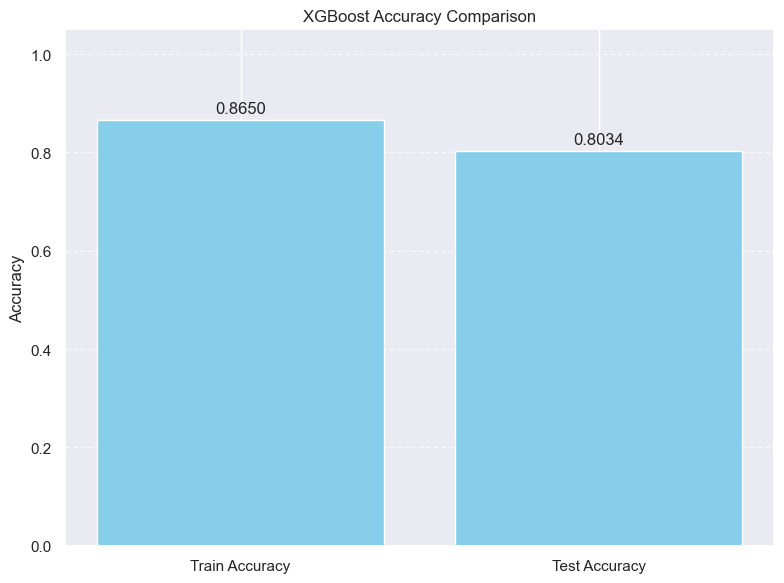

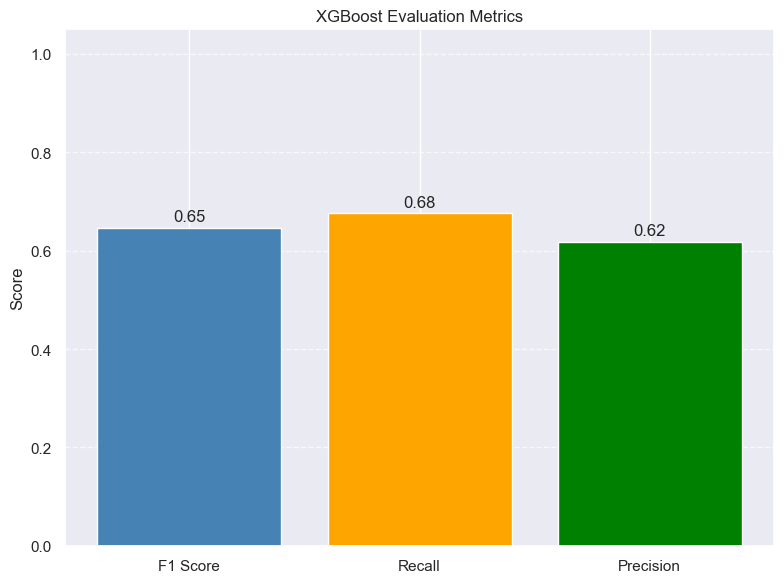

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

print("XGBoost tuning and evaluation...")

# Parameters grid
xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.1, 0.2]
}

# GridSearchCV
xgb_grid = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    xgb_params, cv=5, scoring='accuracy', n_jobs=-1
)
xgb_grid.fit(X_res, y_res_num)

# Best model
xgb = xgb_grid.best_estimator_

# Predictions
pred_train_xgb = xgb.predict(X_res)
pred_test_xgb = xgb.predict(X_testSc)

# Accuracy scores
train_accuracy = accuracy_score(y_res_num, pred_train_xgb)
test_accuracy = accuracy_score(y_test_num, pred_test_xgb)

# Plot accuracy comparison
metrics = ['Train Accuracy', 'Test Accuracy']
values = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.4f}", 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords="offset points", 
                 ha='center', fontsize=12)

plt.ylim(0, 1.05)
plt.title("XGBoost Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Evaluation metrics
f1 = f1_score(y_test_num, pred_test_xgb, pos_label=1)
recall = recall_score(y_test_num, pred_test_xgb, pos_label=1)
precision = precision_score(y_test_num, pred_test_xgb, pos_label=1)

metrics = ['F1 Score', 'Recall', 'Precision']
values = [f1, recall, precision]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['steelblue', 'orange', 'green'])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.2f}", 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords="offset points", 
                 ha='center', fontsize=12)

plt.ylim(0, 1.05)
plt.title("XGBoost Evaluation Metrics")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Best Parameters:", xgb_grid.best_params_)


In [35]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

cat_clf = CatBoostClassifier(random_state=42, verbose=0, train_dir='/tmp/catboost_info')

CatBoost tuning and evaluation...


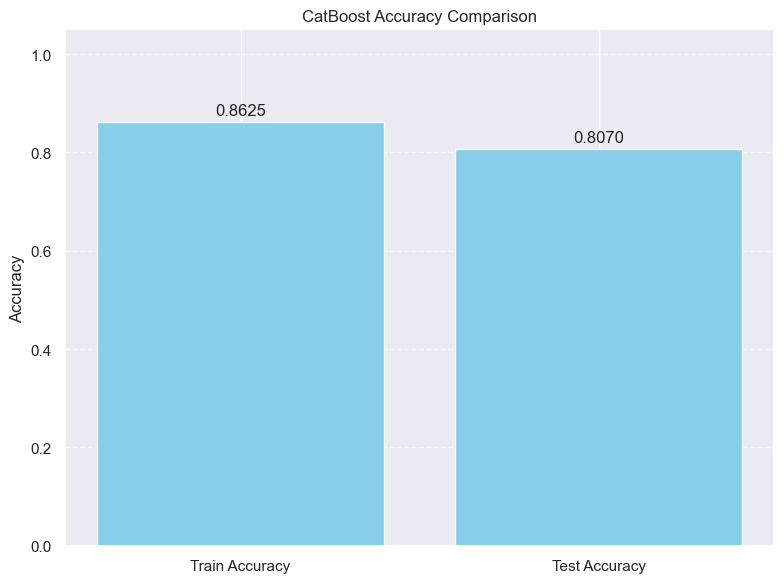

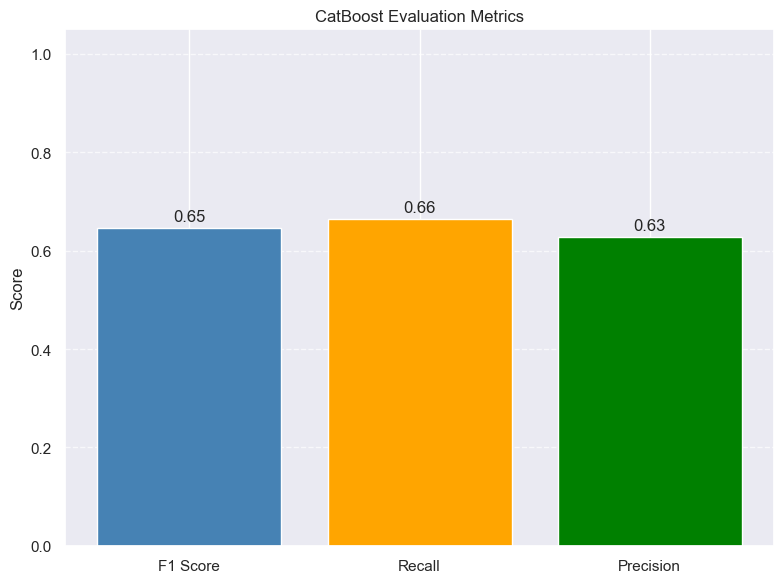

Best Parameters: {'depth': 3, 'iterations': 100, 'learning_rate': 0.2}


In [48]:


print("CatBoost tuning and evaluation...")

# CatBoost parameters grid
cat_params = {
    "iterations": [100, 200],
    "depth": [3, 5],
    "learning_rate": [0.1, 0.2]
}

cat_clf = CatBoostClassifier(random_state=42, verbose=0)

grid_search = GridSearchCV(
    cat_clf,
    param_grid=cat_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'  # raise error instead of silent failure
)

grid_search.fit(X_res, y_res_num)

best_cat = grid_search.best_estimator_

# Predictions
pred_train_cat = best_cat.predict(X_res)
pred_test_cat = best_cat.predict(X_testSc)

# Accuracy scores
train_accuracy = accuracy_score(y_res_num, pred_train_cat)
test_accuracy = accuracy_score(y_test_num, pred_test_cat)

# Plot accuracy comparison
metrics = ['Train Accuracy', 'Test Accuracy']
values = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.4f}", 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords="offset points", 
                 ha='center', fontsize=12)

plt.ylim(0, 1.05)
plt.title("CatBoost Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Evaluation metrics
f1 = f1_score(y_test_num, pred_test_cat, pos_label=1)
recall = recall_score(y_test_num, pred_test_cat, pos_label=1)
precision = precision_score(y_test_num, pred_test_cat, pos_label=1)

metrics = ['F1 Score', 'Recall', 'Precision']
values = [f1, recall, precision]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['steelblue', 'orange', 'green'])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.2f}", 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), 
                 textcoords="offset points", 
                 ha='center', fontsize=12)

plt.ylim(0, 1.05)
plt.title("CatBoost Evaluation Metrics")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Best Parameters:", grid_search.best_params_)


C:\Users\dinzbakti\AppData\Local\Temp\ipykernel_6052\2580971662.py:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\dinzbakti\AppData\Local\Temp\ipykernel_6052\2580971662.py:40: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\dinzbakti\AppData\Local\Temp\ipykernel_6052\2580971662.py:41: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



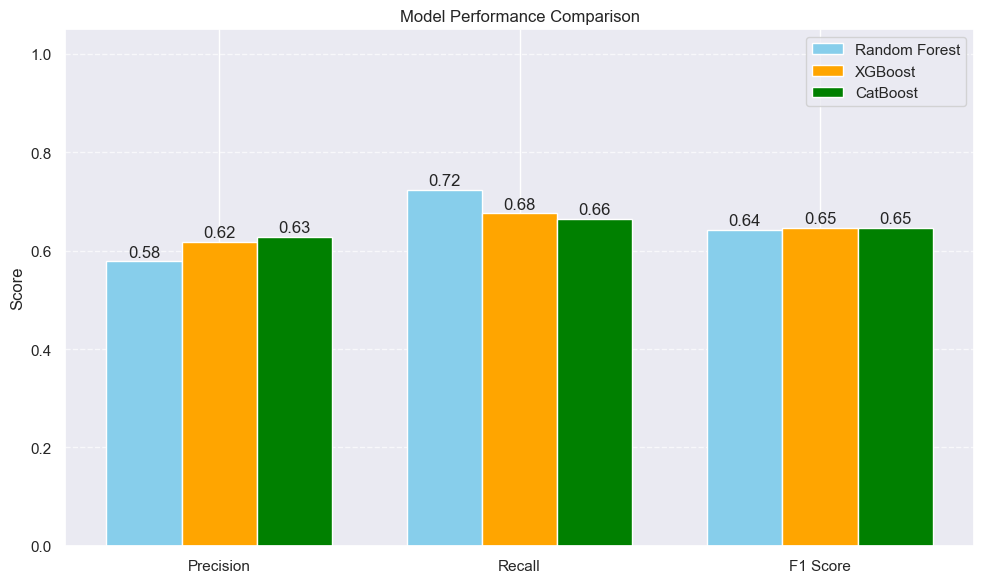

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Define metric labels
metrics = ['Precision', 'Recall', 'F1 Score']

# Collect metric values in a DataFrame
scores_df = pd.DataFrame({
    'Random Forest': [
        precision_score(y_test_num, pred_test_rf, pos_label=1),
        recall_score(y_test_num, pred_test_rf, pos_label=1),
        f1_score(y_test_num, pred_test_rf, pos_label=1)
    ],
    'XGBoost': [
        precision_score(y_test_num, pred_test_xgb, pos_label=1),
        recall_score(y_test_num, pred_test_xgb, pos_label=1),
        f1_score(y_test_num, pred_test_xgb, pos_label=1)
    ],
    'CatBoost': [
        precision_score(y_test_num, pred_test_cat, pos_label=1),
        recall_score(y_test_num, pred_test_cat, pos_label=1),
        f1_score(y_test_num, pred_test_cat, pos_label=1)
    ]
}, index=metrics)

# Plotting
x = np.arange(len(metrics))  # label locations
width = 0.25  # width of bars

plt.figure(figsize=(10, 6))
plt.bar(x - width, scores_df['Random Forest'], width, label='Random Forest', color='skyblue')
plt.bar(x, scores_df['XGBoost'], width, label='XGBoost', color='orange')
plt.bar(x + width, scores_df['CatBoost'], width, label='CatBoost', color='green')

# Add score labels
for i in range(len(metrics)):
    plt.text(x[i] - width, scores_df['Random Forest'][i] + 0.01, f"{scores_df['Random Forest'][i]:.2f}", ha='center')
    plt.text(x[i], scores_df['XGBoost'][i] + 0.01, f"{scores_df['XGBoost'][i]:.2f}", ha='center')
    plt.text(x[i] + width, scores_df['CatBoost'][i] + 0.01, f"{scores_df['CatBoost'][i]:.2f}", ha='center')

plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
